In [32]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
from cycler import cycler
import matplotlib as mpl
api = wandb.Api()
project = "Autoformer"
runs = api.runs(f"hounie/{project}")
all_runs = []
for run in tqdm(runs):
    if run.State=="finished":
        for split in ["train", "test"]:
            for metric in ["mse",]:
                pred_len = run.config["pred_len"]
                metrics = np.zeros(pred_len)
                if (run.name=="Resilient" and run.config["resilient_alpha"]==1 and run.config["resilient_beta"]==2 and run.config["resilient_lr"]==0.001) or (run.name=="Constrained" and run.config["dual_lr"]==0.01 and run.config["dual_init"]==1.0) or run.name=="ERM":
                    for i in range(pred_len):
                        run_dict = {**run.config}
                        #run_dict["constraint_level"] = constraint_level
                        run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                        run_dict["step"]=i
                        run_dict["split"] = split
                        run_dict["Algorithm"] = run.name
                        all_runs.append(run_dict)

df = pd.DataFrame(all_runs)               

100%|██████████████████████████████████████████████████████████████████████| 69/69 [00:01<00:00, 56.36it/s]


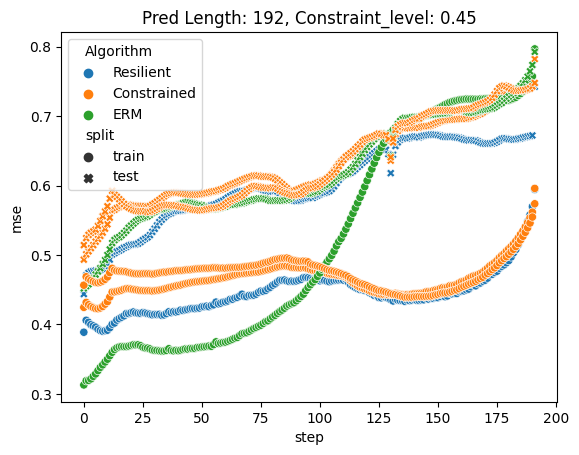

In [33]:
for pred_len, series in df.groupby("pred_len"):
    if pred_len==192:
        for constraint_level in [0.45]:
            plot_series = series[series["constraint_level"].isin([0.45, 0.0, 0.5])]
            sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
            plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
            plt.show()

In [ ]:
for pred_len, series in df.groupby("pred_len"):
    for constraint_level in [0.45, 0.5, 0.55]:
        plot_series = series[series["constraint_level"].isin([constraint_level, 0, 0.4])]
        sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        plt.show()